# Sequence Analysis

## Table of content

1. [Sequence Analysis](#Sequence-Analysis)
   1. [Table of content](#Table-of-content)
2. [Basics](#Basics)
3. [Dotblots](#Dotblots)
   1. [Parameters Window Size and Allowed Error](#Parameters-Window-Size-and-Allowed-Error)
   2. [Substitution matrices and threshold](#Substitution-matrices-and-threshold)
   3. [Online tools to create Dotblots](#Online-tools-to-create-Dotblots)
      1. [Emboss dotmatcher](#Emboss-dotmatcher)
      2. [vector builder](#vector-builder)
      3. [dotlet](#dotlet)
4. [Alignments](#Alignments)
   1. [Pairwise Alignments](#Pairwise-Alignments)
      1. [Global Alignments](#Global-Alignments)
      2. [Local Alignments](#Local-Alignments)
      3. [Semi-Global Alignments](#Semi-Global-Alignments)
   2. [Quality of an Alignment](#Quality-of-an-Alignment)
      1. [Score](#Score)
      2. [Editing distance](#Editing-distance)
      3. [Substitution matrices](#Substitution-matrices)
         1. [PAM matrices](#PAM-matrices)
         2. [BLOSUM matrices](#BLOSUM-matrices)
      4. [Gap costs](#Gap-costs)
   3. [Calculating-Pairwise-Alignments](#Calculating-Pairwise-Alignments)
      1. [Needleman-Wunsch Algorithm for global alignments](#Needleman-Wunsch-Algorithm-for-global-alignment)
      2. [Semi-Global Alignments](#Semi-Global-Alignments)
      3. [Smith-Waterman Algorithm for local alignment](#Smith-Waterman-Algorithm-for-local-alignment)
   4. [Analyzing Alignments](#Analyzing-Alignments) 
5. [Pairwise Alignment in Python](#Pairwise-Alignment-in-Python)
   1. [Adjusting the Parameters](#Adjusting-the-Parameters)
      1. [Substitution matrices](#Substitution-matrices)
      2. [Gap penalties](Gap-penalties)
      3. [Local/global alignment](#Local/global-alignment)
6. [Multiple Sequence Analysis - MSA](#Multiple-Sequence-Analysis---MSA)
   1. [Heuristic approaches](#Heuristic-approaches)
   2. [Progressive alignments](#Progressive-alignments)
   3. [ClustalW](#ClustalW)
   4. [Analyzing MSAs](#Analyszing-MSAs)
8. [Exercises](#Exercises)
   1. [Exercises 1-3](#Exercises-1-3)
   2. [Exercise 4 - Calculating Alignments](#Exercise-4---Calculating-Alignments)
   3. [Exercise 5 - Optimal Alignment](#Exercise-5---Optimal-Alignment)
   4. [Exercise 6 - TRUD domains again](#Exercise-6---TRUD-domains-again)
   5. [Exercise 7 - Best Alignment](#Exercise-7---Best-Alignment)
   6. [Exercise 8 - Best Alignment in Python](#Exercise-8---Best-Alignment-in-Python)

# Basics

From a bioinformatic standpoint sequences are just big strings.

General limitations to keep in mind:

- normally we have no/limited knowledge about the sequences we work with
- most tools were developed with protein sequences in mind and were later changed to be able to work with nucleotides as well

Standard approach of sequence analysis:

- start with a database search (FastA or BLAST)
- create a Multiple sequence Alignemtn (e.g. ClustalW)
- then do some pair-wise Alignment (e.g. Needleman-Wunsch)
- create a graphical comparison of your sequences using a dotblot

Relations between sequences can be:

- Homologs (sequences that developed from a common ancestor)
   - orthologs (homologs in different species, mostly retain their function)
   - paralogs (homologs in the same species, often develop new functions)

Important terms:

- Identity = amount of *identical* letters in an Alignment; amount of matches
- Similarity = amount of similar amino acids (similar physico-chemical properties, e.g. Phe and Tyr)

# Dotblots

Comparison of biological sequences. Both sequences are applied to the horizontal and vertical axis of a diagram and matches between a column and a row are marked with a point (or line) at the specific intersection

This is an example of a Sequence being compared to itself:

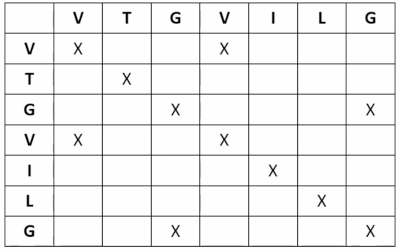

Meaning of the patterns (see powerpoint for example images):

- Long diagonal lines in a DotPlot refer to long stretches of identical (similar) letters in both sequences
- The most important diagonal is the main diagonal going from the top left corner to the bottom right corner, since it represents the letter by letter comparison of both sequences
- Breaks in these diagonals indicate “gaps”, that means regions were one sequence does not match the other sequence (This is mainly true if the diagonal continues afterwards)
- Multiple parallel diagonals refer to repeating parts of the sequences, e.g. domains
- Big blocks of Dots refer to “low complexity regions”, e.g. poly Alanine (AAAAAA) or repeats


## Parameters Window Size and Allowed Error

There are two main parameters that can be adjusted in Dotplots to reduce noise. Keep in mind that the Dotblot is usally done *after* the pairwise alignment, i.e. we already know identiy and similarity of the sequences

- Window size (W)
  - how many letters of both sequence to compare at once
  - goes frame by frame in the defined size and draws a line if all letters if the subset are identical
  - window sizes: proteins 10-15, Nucleotides 20-30
  - all comparisons are done, i.e. I go one letter further in the column every comparison and compare all to the first chunk in the rows, then I again go over one step at a time in the columns and compare it all to the rows one letter down and so on. Comparisons done: orange, red, blue, green
  - if windows overlap the line is elongated

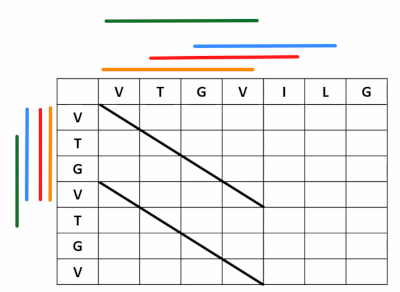

- Allowed Errors (E or S)
  - Number of mismatches allowed in Window size
  - can only be used in combination with window size
  - good starting values for proteins 3-6 or for nucleotides 5-10
  - Example: a windowsize of 4 with 1 Error allowed
     - the diagonal is elongated in this example since TGVI (columns) and TGVT (row) are also an accepted comparison with only one difference
     - since the two accepted windows overlap the diagonal is elongated
- most often this is replaced by the substitution matrix and a threshold

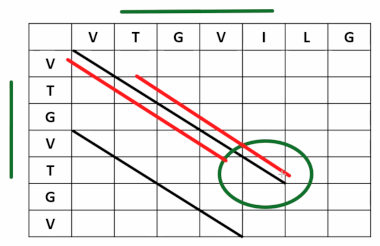

## Substitution matrices and threshold

To model similarities between amino acids that are different, but have the same properties, substitution matrices are used. 

- The values in these matrices can be positive or negative, usually between -12 and 12.
- in each window the sum of the comparisons is calculated and compared to a determined threshold
- e.g. to compare TGVI and TGVT we compare T/T G/G V/V and I/T, we get a number for each comparison, sum them up and if the number is above a certain threshold we accept the comparison
- the thresholf for a window of 10 could e.g. be 23







## Online tools to create Dotblots

### Emboss dotmatcher

https://www.ebi.ac.uk/jdispatcher/seqstats/emboss_dotmatcher

- for protein or nucleotide sequences
- Parameters:
    - Matrix: which substitution matrix to use
       - BLOSUM62 is standard
       - The numbers refer to sequence identity, i.e. how identical are the two sequences we compare 
    - Window size (see above)
    - threshold of substitution sum

### vector builder

https://en.vectorbuilder.com/tool/sequence-dot-plot.html

- for nucleotide sequences only
- you have to copy and paste the sequence
- options:
   - Window size
   - mismatch limit
   - doesn't contain any Substritution matrices, since we only compare nucleotides
- output includes forward and reverse complement, this means that ince they are looked at from the beginning and once from the back, i.e. one sequence is looked at from the back and the other from the front
- also shows levels of homology in percent
- save image through right click

### dotlet

https://dotlet.vital-it.ch 

- click on the sequences and names to change them
- Window size and scoring matrix can be adjusted at the top
- at the bottom right are two scrollbars that have to be adjusted
   - the top one until the end of the blue bell curve (= histogramm of how often a certain score occurs) (~35%) (lower threshold)
   - the lower one until ca 60-70% (upper threshold)
   - these are approximate values that have to be adjusted
- includes a scrollable sequence viewer so we can immediately compare the sequences
   - can be accessed by moving the red bars in the plot or with the bars at the bottom
   - absolute matches are highlighted in the sequence viwer
- to download the image there is a print button at the top (this is broken at the moment, so just screenshot)
- based on Javascript

# Alignments

Alignments are used to compare sequences based on their amino acids/nucleotides. It is in itself an abstract measure for similarity

When two sequences are aligned (= pairwise alignment) there are three possibilties:

- letter - letter (same or different)
  - match (conservation)
  - mismatch (point mutation)
- letter - nothing
  - INDEL (insertion or deletion) 
- nothing - letter
  - INDEL (insertion or deletion)

When more than two sequences are aligned we talk aout Multiple Sequence Alignments (MSAs)

## Pairwise Alignments

There are different types of pairwise alignment with specific uses, often different methods are used to determine the best for a specific case.

### Global Alignments

- first and last letters of both sequences are aligned at all times, even if they don't match
- the remaining aa are shifted to reach highest similarity
- used for sequences close in length (+/- 10% maximum length difference)
- allows to compare the whole sequences
- e.g. Needleman-Wunsch
- EMBOSS needle with gap end penalty (End gap TRUE). The value for the end gap open penalty may have to be increased until a true global align is achieved. If the sequences don't align perfectly at one end it will give back a semi-global alignment until the cost of the gap at the end/the beginning is too big. By adjusting the end gap open parameter I can increase the cost of this very first or very last gap until a global alignment is forced
- https://www.ebi.ac.uk/jdispatcher/psa/emboss_needle

### Local Alignments

- shows only the part of the sequences that match best with each other
- used to compare only parts of the sequences (e.g. similar conserved domains in otherwise very different proteins)
- can be problematic if the sequences are too different
- should have at least 50% similarity in the domain parts
- may cut the parts of the sequences that are not being aligned at the beginning or end!!
- EMBOSS water
- https://www.ebi.ac.uk/jdispatcher/psa/emboss_water

### Semi-Global Alignments

- used when one sequence is much shorter than the other, compares the shorter to the longer
- the shorter sequence is aligned completely to a part of the longer sequence
- especially useful to compare one-domain proteins with sequences of multidomain proteins
- both sequences appear completly in the finished alignemtn
- EMBOSS needle with default parameters
- https://www.ebi.ac.uk/jdispatcher/psa/emboss_needle



## Quality of an Alignment

There are two ways to determine the qualtiy: score and editing distance. Both use the concept of costs, which occur for match, mismatch or gap, but it is *not possible to compare score and editing distance* even of the same sequences 

- Match/Mismatch cost
  - fixed number or taken from substitution matrix
- Gap cost
  - fixed number or calculated according to a function dependent on the length of the gap

The costs are arbitrary but oriented on the likelihood of their occurrence calculated by comparing known sequences.

### Score

- matches are giving positive numbers
- mismatches and gaps negative numbers
- we look for the highest possible score
- it is possible to compare scores for different alignments *of the same two sequences*
- it is *not possible* to compare the scores for the alignments of *different* sequences, since the score is highly dependent on sequence length (and aa content in case of a subsitution matrix)

### Editing distance

- match has a cost of 0
- mismatches/gaps have a positive cost
- we look for the smallest possible editing distance

### Substitution matrices

- 20x20 for aa or 4x4 for nucleotides
- replace constant costs with variable costs for all possibe letter combinations
- take into account
  -  Amino acids have different probabilities to mutate into one another
  -  A Substitution matrix saves these values:
     - High positive number: probable mutation
     - High negative number: improbable mutation
     - 0: neutral mutation
   
#### PAM matrices

PAM = point accepted mutation, created by Martha O. Dayhoff

- calculation based on >1500 observed mutations in >60  sequences of closely related proteins (>85% identiy)
- Counted the number of mismatches between all aa, e.g. how often is Phe matched with Tyr, for all aa combinations
- Frequency = how often is a particular aa present in all sequences
- Mutability = how often is a particular aa mutated

Using the counts, the frequency and mutability the PAM1 matrix was calculated, on which all other PAM matrices are based. All other PAM matrices are calculated using interpolations of the values of PAM1

- assumptio: If these two proteins are related, the evolutionary interval separating them is the time taken for n point accepted mutations to occur per 100 amino acids
- the higher the number of PAM the lower the identity between the sequences
- with unknown sequences start somewhere in the middle, when you have an idea of the % identity rerun the analysis to get the best results
- identity <25% is the "twilight zone" be very critical of the result of the Alignment here

|PAM|% identity|
|--|--|
|0|100|
|30|75|
|80|50|
|110|40|
|200|25|
|250|20|

If possible use BLOSUM matrices not PAM matrices

#### BLOSUM matrices

BLOSUM = BLOcks SUbstitution Matrix

- score alignments between evolutionary divergent protein sequences
- based on local alignments (rather than global as PAM)
- used the BLOCKS database, which contains sequence alignments for conserved protein domains they were able to get local Alignments without any gaps in them
- general process similar to PAM
- log-odds scores weree calculated for all aa combinations
- different BLOSUM matrices: the higher the number the more closely related the sequences
  - BLOSUM80 for closely related BLOSUM45 for distantly related proteins
- the numbers also reflect the source material, e.g. BLOSUM 62% was built using sequences with >= 62% identity
- each BLOSUM matrix has its own alignment basis, which is always newer and more divers than the PAM matrices

### Gap costs

In practise we don't assign linear gap costs (every gap has the same cost, irrespective of position or length) but *affine* gap costs

- the first letter is assigned a very high cost
- in a gap spanning more than one letter the 2nd to nth letter are assigned a smaller cost, i.e. multiple small gaps are more expensive than one large one

Formular for affine gap costs:

- where `G(k)` is the cost for a specifc gap
- `k` is the length of the gap
- `a` and `b` are pre-defined constants with `a` being the so-called gap-open cost and `b` being the so called gap-extension cost

```
G(k) = a + bk
```

Other gap cost calculations are the logarithmic Gap cost or the log-affine Gap cost

```
logarithmic gap cost:
G(k) = a + c ln(k)
```


## Calculating Pairwise Alignments

Only optimal pairwise alignments are useful, it is therefore necessary to find the best of all possible alignments.

- brute force algorithm
  - calculate *all* possible scores and pick the best
  - this gets out of hand *very* quickly and is in short impossible
- most effective way is visualizing all alignments as matrix (similar to dotplot), but instead of dots we have the score of the letter combination
- each path is a score we want the path with the highest score
- Needleman-Wunsch used a recursive dynamic programing approach to find the optimal path
  - separated the whole into smaller fragments and using the solutions of the smaller fragments to fin the optimal solution overall
  - especially useful for global alignments

### Needleman-Wunsch Algorithm for global alignment

- used for global alignments
- uses a dynamic programminapproach using recursive matrix creation
- two steps to the algorithm
  1. Create an alignment matrix
     - the matrix consists of the two sequences at the left and the top axis preceded by one empty row and column
     - the score for each cell is calculated by using the scores of the neighboring cells to the left (introducing a gap in the sequence at the top), top (introducing a gap in the sequence on the left) or top-left (going along a diagonal, i.e. along the sequence and aligning the two letters in the sequences)
     - this gives three potential scores of which the highest is used
     - the thought is that we can either align the two sequences (diagonal) or introduce a gap in on of them (either top or left)
     - going diagonal the score added is taken from the substitution matrix, going from the top of from the left takes the score from the Gap cost
     - we save the paths that create the highest scores, so those are already a lot fewer than every possibility
  2. search the optimal way through using a back-tracking algorithm
     - now we go from the topleft to the bottomright along the paths to find the overall highest score adding up the scores along the way
     - this we do *backwards*  as it drastically reduces the possibilites (like solving a labyrinth from the exit to the inside)
     - if we come across a field that has two options we pick the one that has the better score (just at this one level)
- see ppt for an example (the example using a fixed gap cost of -6)

### Semi-Global Alignments

- the algorithm for the semi-global alignment follows similar prinicples, with a few notable differences
- the first row and column are always filled with 0
- the backtracking doesn't start in the bottom right corner, but at the highest score in the last column or last row (wherever the highest score is)
- the backtracking doesn't (have to) go to the very top left corner, but stops as soon as the first column or row is reached

### Smith-Waterman Algorithm for local alignment

- again follows the logic of Needleman-Wunsch with some differences:
- during grid creation the lowest possible score is 0 (negative values are replaced by 0)
- only paths leading to scores >0 are saved
- traceback starts at the highest overall score inside the whole matrix
- traceback ends as soon as we hit a 0
- if there are several fields with the same highest score we do the traceback for them all and use the highest score in the end

## Analyzing Alignments

- it is not possible to compare alignments of different sequences
- it is not possible to compare alignment scores with editing distances

Main outputs of an alignment:

- Length: Number of columns in the Alignment, should be near the length of the longer sequence
- Identity: Number of matches, should be as high as possible
- Similarity: Number of mismatches of similar amino acids, should be as high as possible
- Gaps: Number of letters aligned to nothing, should be as low as possible
- Overall Score: Sum of all match, mismatch and gap costs over the whole Alignment, should be as high as possible

Further outputs:

1. The amount of gaps
2. The placement of gaps, inside our outside of specific domains
3. Regions with a disproportionately large amount of matches
4. Influence of Low-complexity regions
5. Comparing the Alignment to a secondary structure prediction



# Pairwise Alignment in Python

Two modules for alignment in biopython: Align and pairwise2

- both use the same algorithm
- pairwise2 is on the removal list of biopython
- Best module is `Align`, offers a lot of adjustments
- input has to be a sequence object from the SeqIO parser or be in the form of strings


```
from Bio import Align
```

- first a PairwiseAligner object has to be created
- then parameters can be adjusted, once this is done the alignment is done (= creating a PairwiseAlignment object)
- It's also possible to just get back the score
- depending on the parameters we can get more than one alignment! The number of possible alignments can be seen with `len`
- we can access the individual alignements with `[]` starting at `0` 

```
aligner = Align.PairwiseAligner()

alignments = aligner.align(seq1.seq, seq2.seq)

score = aligner.score(seq1.seq, seq2.seq)
```





In [2]:
# load modules and read in files
from Bio import SeqIO
from Bio import Align

seq1 = SeqIO.read("alpha.faa", "fasta")
seq2 = SeqIO.read("beta.faa", "fasta")

In [20]:
#creating the PairwiseAligner object and looking at the properties
aligner = Align.PairwiseAligner()
print(aligner)
#print(dir(aligner))

#to see e.g. the algorith to be used:
print(aligner.algorithm)

Pairwise sequence aligner with parameters
  wildcard: None
  match_score: 1.000000
  mismatch_score: 0.000000
  target_internal_open_gap_score: 0.000000
  target_internal_extend_gap_score: 0.000000
  target_left_open_gap_score: 0.000000
  target_left_extend_gap_score: 0.000000
  target_right_open_gap_score: 0.000000
  target_right_extend_gap_score: 0.000000
  query_internal_open_gap_score: 0.000000
  query_internal_extend_gap_score: 0.000000
  query_left_open_gap_score: 0.000000
  query_left_extend_gap_score: 0.000000
  query_right_open_gap_score: 0.000000
  query_right_extend_gap_score: 0.000000
  mode: global

Needleman-Wunsch


In [16]:
# creating the PairwiseAlignment object
alignments = aligner.align(seq1.seq, seq2.seq)
print(alignments)
print()

print(f"There are {len(alignments)} possible alignments with the same highest score of {alignments.score}.")
print("So the default parameters are maybe not the most precise :-)")


There are 108 possible alignments with the same highest score of 344.0.
So the default parameters are maybe not the most precise :-)


In [15]:
# calculating just the highest score
score = aligner.score(seq1.seq, seq2.seq)
print(score)

344.0


In [11]:
#having a look at the things that can be done with the PairwiseAlignment object
print(dir(alignments))
print()
print(alignments.sequences)

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_index', '_paths', 'rewind', 'score', 'sequences']

[Seq('MNGTEGPNFYVPFSNVTGVVRSPFEQPQYYLAEPWQFSMLAAYMFLLIVLGFPI...APA'), Seq('MNGTEGPNFYVPFSNITGVVRSPFEQPQYYLAEPWQFSMLAAYMFLLIVLGFPI...APA')]


In [104]:
# looking at the first of the 108 possible alignments
#print(alignments[0])
print()
print(dir(alignments[0]))

#looking how many gaps I have
#print((alignments[0].counts()))
print()
print((alignments[0].length))


['__add__', '__array__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_convert_sequence_string', '_format_generalized', '_format_pretty', '_format_unicode', '_get_row', '_get_row_col', '_get_row_cols_iterable', '_get_row_cols_slice', '_get_rows', '_get_rows_col', '_get_rows_cols_iterable', '_get_rows_cols_slice', 'aligned', 'coordinates', 'counts', 'format', 'frequencies', 'indices', 'infer_coordinates', 'inverse_indices', 'length', 'map', 'mapall', 'query', 'reverse_complement', 'score', 'sequences', 'shape', 'sort', 'substitutions', 'target']

715


## Adjusting the Parameters 

Parameters are by default

- match score of 1
- mismatch score of 0
- linear gap cost of 0

Since this is not very useful we can adjust the paramters

### Substitution matrices

- substitution matrices are part of the Align submodule of biopython
- available matrices:
   - 'BENNER22', 'BENNER6', 'BENNER74', 'BLOSUM45', 'BLOSUM50', 'BLOSUM62', 'BLOSUM80', 'BLOSUM90‘, 'DAYHOFF', 'FENG', 'GENETIC', 'GONNET1992', 'HOXD70', 'JOHNSON', 'JONES', 'LEVIN', 'MCLACHLAN', 'MDM78', 'NUC.4.4', 'PAM250', 'PAM30', 'PAM70', 'RAO', 'RISLER', 'SCHNEIDER', 'STR', 'TRANS'
- once we loaded we can hand over the matrix to the PairwiseAligner

```
from Bio.Align import substitution_matrices

blosum62 = substitution_matrices.load("BLOSUM62")

aligner.substitution_matrix = blosum62
```

### Gap penalties

Many types of gap penalties are available

Normal affine gap penalties are defined the following way

```
aligner.open_gap_score = -10
aligner.extend_gap_score = -0.5
```

To try and force a semi-global alignment set the end gap penalties to 0:

```
aligner.end_open_gap_score = 0
aligner.end_extend_gap_score = 0
```

To use a linear gap cost, where every gap is penalized the same:

```
aligner.gap_cost = -6
```

It is also possible to set the gap costs differently for the beginning (left) or end (right) of the alignment or for the two sequences (target (first argument, top of alignment))vs. query(second argument, bottom of alignment)), e.g. to ensure that the shorter sequence is not torn apart as much

```
target_left_open_gap_score = 0
right_open_gap_score = 0
query_open_gap_score = 0
etc.
```


### Local/global alignment

- per default the alignment is global (actually pretty strictly global, gap parameters have to be fiddled with to get a semi-global alignment, see above)
- to calculate a local alignment adjust the mode

```
aligner.mode = "local"
```



In [1]:
# load modules and read in files
from Bio import SeqIO
from Bio import Align
from Bio.Align import substitution_matrices

seq1 = SeqIO.read("alpha.faa", "fasta")
seq2 = SeqIO.read("beta.faa", "fasta")

#creating the PairwiseAligner object and looking at the properties
aligner = Align.PairwiseAligner()

#setting the parameters

## substitution matrix
blosum62 = substitution_matrices.load("BLOSUM62")
aligner.substitution_matrix = blosum62

## gap penalties
aligner.open_gap_score = -10
aligner.extend_gap_score = -0.5

print(aligner)

Pairwise sequence aligner with parameters
  substitution_matrix: <Array object at 0x1108c4350>
  target_internal_open_gap_score: -10.000000
  target_internal_extend_gap_score: -0.500000
  target_left_open_gap_score: -10.000000
  target_left_extend_gap_score: -0.500000
  target_right_open_gap_score: -10.000000
  target_right_extend_gap_score: -0.500000
  query_internal_open_gap_score: -10.000000
  query_internal_extend_gap_score: -0.500000
  query_left_open_gap_score: -10.000000
  query_left_extend_gap_score: -0.500000
  query_right_open_gap_score: -10.000000
  query_right_extend_gap_score: -0.500000
  mode: global



In [8]:
# creating the PairwiseAlignment object
alignments = aligner.align(seq1.seq, seq2.seq)
print(f"There is {len(alignments)} possible alignment with the score {alignments.score}.")
print()

print(alignments[0])
print(aligner.algorithm)
print(alignments[0].counts())

There is 1 possible alignment with the score 1835.0.

target            0 MNGTEGPNFYVPFSNVTGVVRSPFEQPQYYLAEPWQFSMLAAYMFLLIVLGFPINFLTLY
                  0 |||||||||||||||.||||||||||||||||||||||||||||||||||||||||||||
query             0 MNGTEGPNFYVPFSNITGVVRSPFEQPQYYLAEPWQFSMLAAYMFLLIVLGFPINFLTLY

target           60 VTVQHKKLRTPLNYILLNLAVADLFMVFGGFTTTLYTSLHGYFVFGPTGCNLEGFFATLG
                 60 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
query            60 VTVQHKKLRTPLNYILLNLAVADLFMVFGGFTTTLYTSLHGYFVFGPTGCNLEGFFATLG

target          120 GEIALWSLVVLAIERYVVVCKPMSNFRFGENHAIMGVVFTWIMALACAAPPLVGWSRYIP
                120 |||||||||||||||||||||||||||||||||||||.|||.||||||||||||||||||
query           120 GEIALWSLVVLAIERYVVVCKPMSNFRFGENHAIMGVAFTWVMALACAAPPLVGWSRYIP

target          180 EGMQCSCGIDYYTLKPEVNNESFVIYMFVVHFTIPMIVIFFCYGQLVFTVKEAAAQQQES
                180 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
query           180 EGMQCSCGIDYYTLKPEVNNESFVIYMFVVHF

# Multiple Sequence Analysis - MSA

Often we want to compare many (>100) sequences at the same time

MSAs are the basis for phylogenetic research and phylogenetic trees

There have to be adjustments made to the scoring schemes when comparing multiple letters. There are exact and heurisitc approaches for this. Exact approaches are very time intensive

## Heurisitic approaches

- Heuristics is the art to get probable statements or practicable solutions with limited knowledge and time
- e.g. educated guesses
- to get the best solution possible with the least possible calculation time/effort
- these algorithms do NOT produce the optimal results but results that are as near as possible to optimal

possible MSA approaches

- 3D Needleman: too CPU intensive
- used instead: progressive alignment

## Progressive alignments

- we first find the best pairwise alignments and then build the MSA around
- done with the helopp of guide trees
- results are often suboptimal but good enough to detect similarities
- one software to do this is ClustalW

## ClustalW

three phases

1. Build all pairwise alignments for all sequences
2. Create a guide tree using a neighbor joining cluster approach
3. Caculate the MSA by using an At-Alignment approach (progressive alignment)

**Step 1**

- for each pair the optimal alignment is generated via Needleman-Wunsch (global alignment!)
- distance between the sequences is calculated using *editing distances*
- these are calculated in a distance matrix (sequences as columns and rows and each field contains the corresponding editing distance)
- this matrix is used to calculate the neighbor joining tree

**Step 2**

- the guide tree is calculate with the help of a cluster method
- we start with the two sequences that have the smallest editing distance and put them in the first cluster of the tree
- the distances to the remainig sequences against this first cluster are then calculated with so called update functions
- there are mnany different update functions, e.g.
  - Single linkage
    - The new distance is the shortest distance of all available distances between our remaining sequences and the already clustered sequences
  - complete linkage
    - The new distance is the longest distance of all available distances between our remaining sequences and the already clustered sequences
  - UPGMA (first version of ClustalW)
    - unweighted pair group method with arithmetic mean
    - see example in ppt
  - thes days more complex neighbor joining algorithnms are used that nonetheless follow a similar logic

Single linkage:
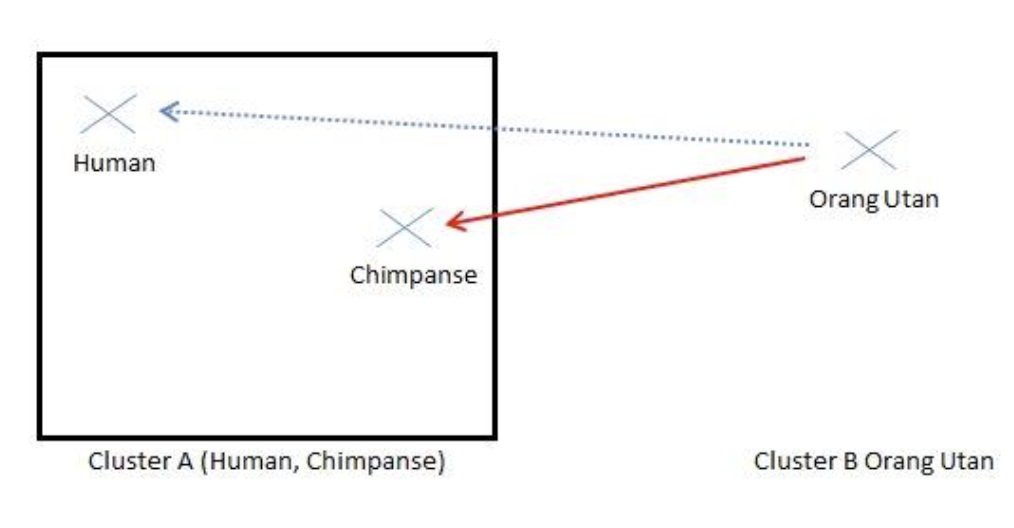

Complete Linkage:
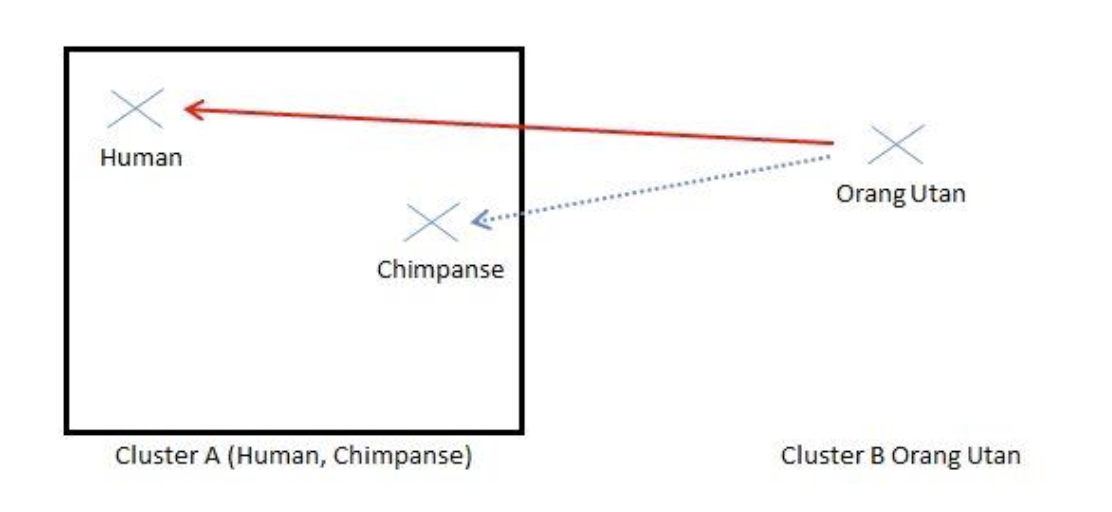

UPGMA:
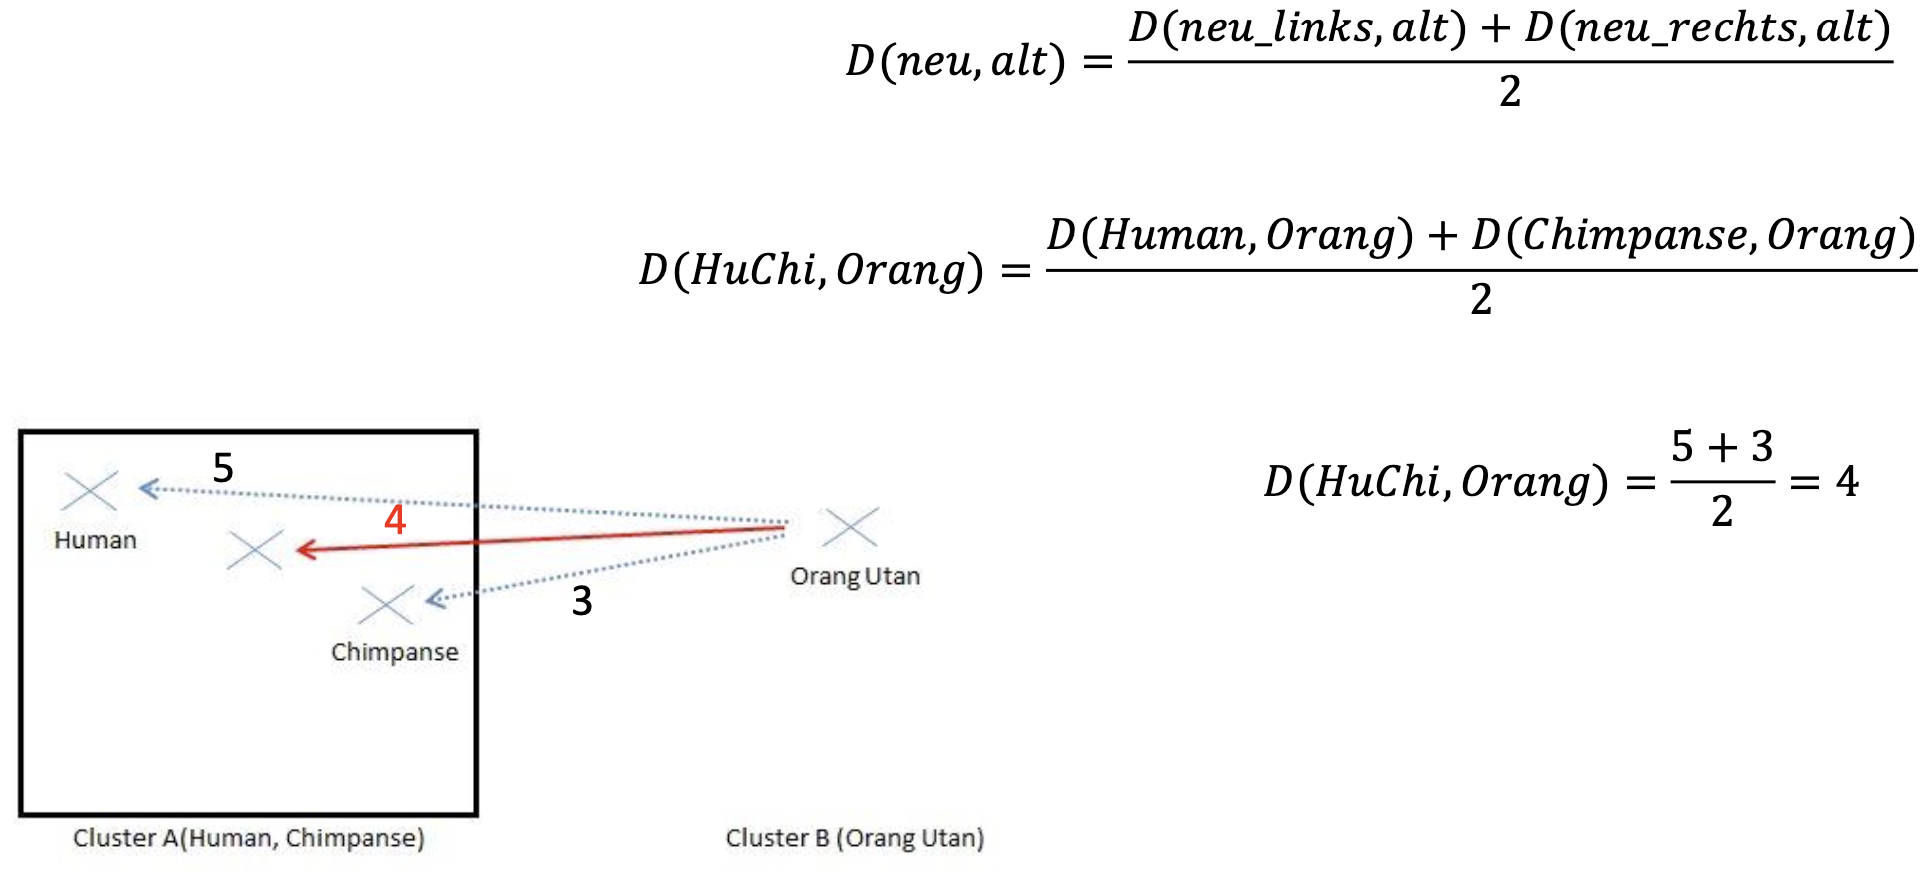#

**Step 3**

- for the alignment the two most similar sequences are first aligned
- the other seqeunces are at-aligned to this global alignment
  - the original alignment *can not* be changed anymore with the exception of adding gaps in *both sequences at the same time*
  - matches/mismatches are kept intact over the whole process
  - and so on down the line

## Analyzing MSAs

An easy way to analysze MSAs is with programs like Jalview, which give an overview over conserved regions or regions with small similarity

- coloring e.g. according to BLOSOM62, the more blue the more similar
- coloring e.g. according to amino acid
- bar diagrams at the bottom contain quality measurements
  1. measurement for the degree of conservation (how often do we have the same letter in this column
     - ranges from 0 to 11 
     - `+` stands for 10 (mutations were all properties are conserved) and `*` for 11 (total conservation)
     - calculated quantitative alignment annotation
     - measures the number of conserved physico-chemical properties conserved for each column of the alignment
     - based on the one used in the AMAS method of multiple sequence alignment analysis
  2. measurement for the quality of the alignment in this column
     - the value is normalized for each column
  3. the consensus of the MSA
     - refers to the letter that appear the most in the corresponding column
     - the bars refer to the percent of this letter in this column
     - if more than one letter is possible a `+` will apear
     - hovering over the `+` will show the possibilities
  4. the occupancy, i.e. how many letter appear in this column, i.e. how many gaps are there
     - if there is a match or mismatch in ever sequence: 100% -> best
     - the higher the better

# Exercises

## Exercises 1-3

See powerpoint with results

## Exercise 4 - Calculating Alignments

Use the scoring schemes below to calculate the overall costs for the following four Alignments:

```
KRATZEN   FAULTIER   SCHAUKA_STEN   UNITEDST__ATES
K_ATZEN   FAULPELZ   SCHAUFENSTER   UNITEDEMIRATES
```

Use the following Costs: Match = M, Mismatch = I, Gap = G

- Editing distance: Match 0; Mismatch 2; Gap 3
- Score: Match 2; Mismatch -2; Gap -3

|Comparison|Editing distance<br/>(smaller is better)|Score<br/>(bigger is better)|
|---|---|---|
|`MGMMMMM`|3|9|
|`MMMIII`|8|0|
|`MMMMMIIGMMMI`|9|7|
|`MMMMMMIIGGMMMM`|10|10|

The scores cannot be compared!!!!

## Exercise 5 - Optimal Alignment

Calculate the optimal Alignments for the following three pairs of Strings:

S1 = “TRACTOR” & S2 = “RACER”
S1 = “WORLD” & S2 = “CROWD”
S1 = “SKELETON” & S2 = “EXPLOSION”

Use the following costs: Match= 5, Mismatch= -2 and Gap= -3

```
TRACTOR     WORL_D    SKELET_ON
_RAC_ER     _CROWD    EXPLOSION

TRACTOR     WOR_LD
_RACE_R     _CROWD
  
            WORL_D
            C_ROWD

            WOR_LD
            C_ROWD

           and more

Score 12   Score 0    Score 9
````

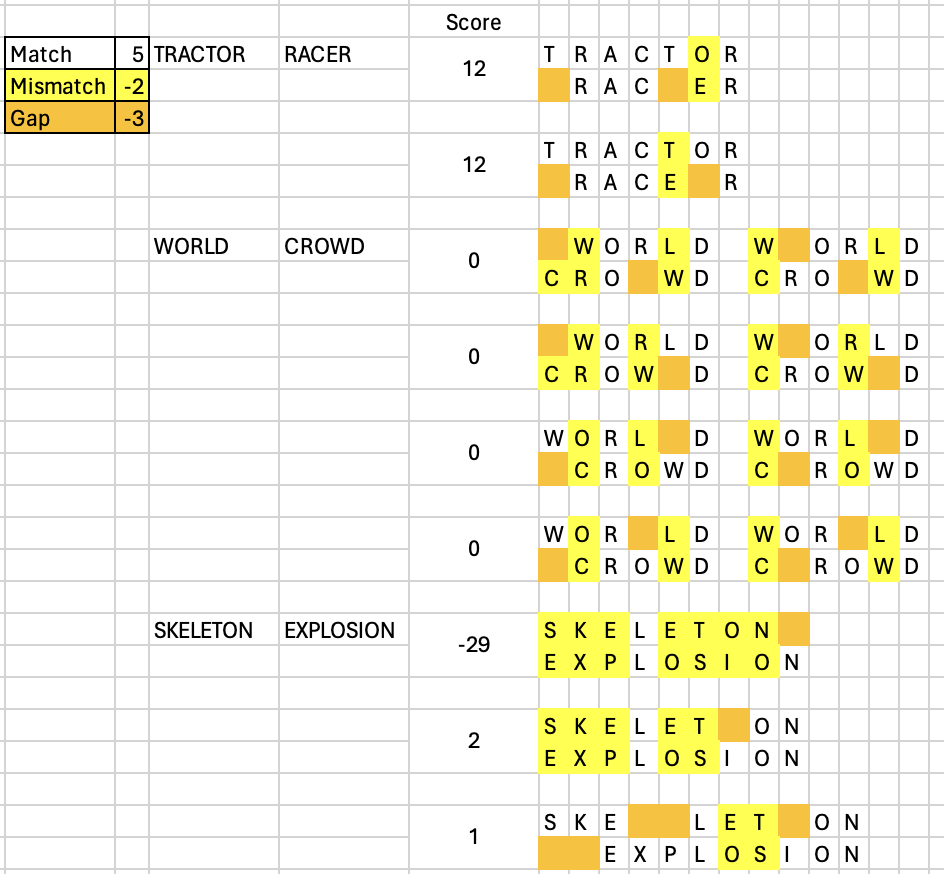


## Exercise 6 - TRUD domains again

During the Dotplot part you compared four sequences carrying a TRUD Domain (M3Z3I3.fasta, Q96PZ0.fasta, A0A5N3XQ52.fasta and A0A9D3NLI7.fasta)

- Use these sequences to run pairwise Alignments using EMBOSS Needle and EMBOSS Water to compare the sequence Q96PZ0.fasta to the other three (6 Alignments in total)
- Make sure to adjust the matrix to fit your results
   - Start with BLOSUM62 and look at the calculated identity
   - Afterwards restart the Alignment with a different matrix, BLOSUM90 for example
- How do the results differ between the two tools?
- Which sequence is the most similar one to Q96PZ0.fasta?

See Excel sheet with overview

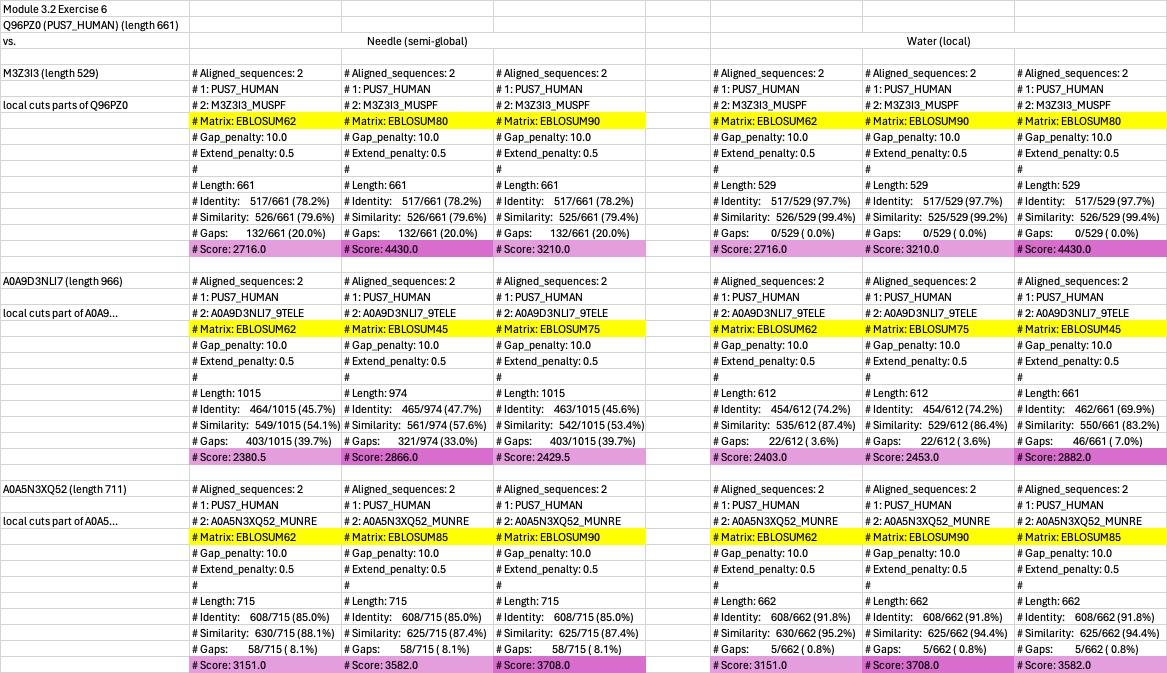

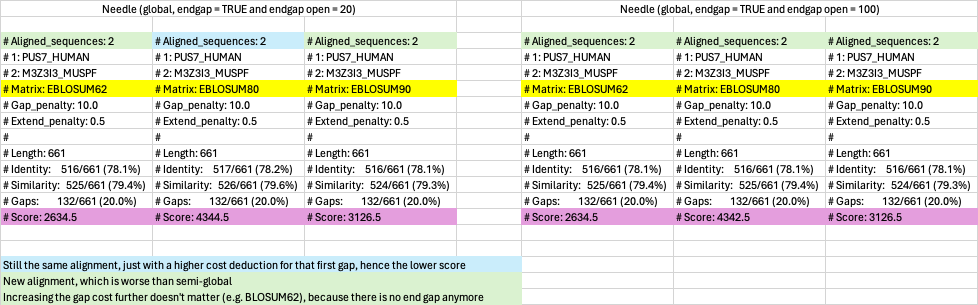

Observations:
- the very similar sequences have the same score in both needle (semi-global) and water (local) when the same BLOSUM is used
- A0A9D3NLI7 is the most dissimilar
- A0A5N3XQ52 is more similar in semi-global and M3Z3I3 is more similar in local
- water (local alignments) has higher identiy and similarity values than needle (semi-global)
- the BLOSUM matrix best suited more often (2/3) reflects the identity from needle (semi-global) better

Christophs conclusion is that A0A5N3XQ52 is the most similar since the whole sequence is aligned

## Exercise 7 - Best Alignment

Use the sequences XP_039961828.fasta and NP_477249.fasta to calculate a pairwise Alignment using EMBOSS Needle with the default parameters
- Calculate the same Alignment while using matrices BLOSUM40 and BLOSUM45
- Which of the three matrices you used produced the best Alignment?
- Afterwards use the matrix that produced the best result to calculate new Alignments but this time adjust the gap penalties as follows:
   - gap_open penalty = 5, gap_extend penalty = 0.5
   - gap_open penalty = 1, gap_extend penalty = 0.5
   - gap_open penalty = 1, gap_extend penalty = 0
- Which of the four Alignments do you think is the best one?

See Excel sheet

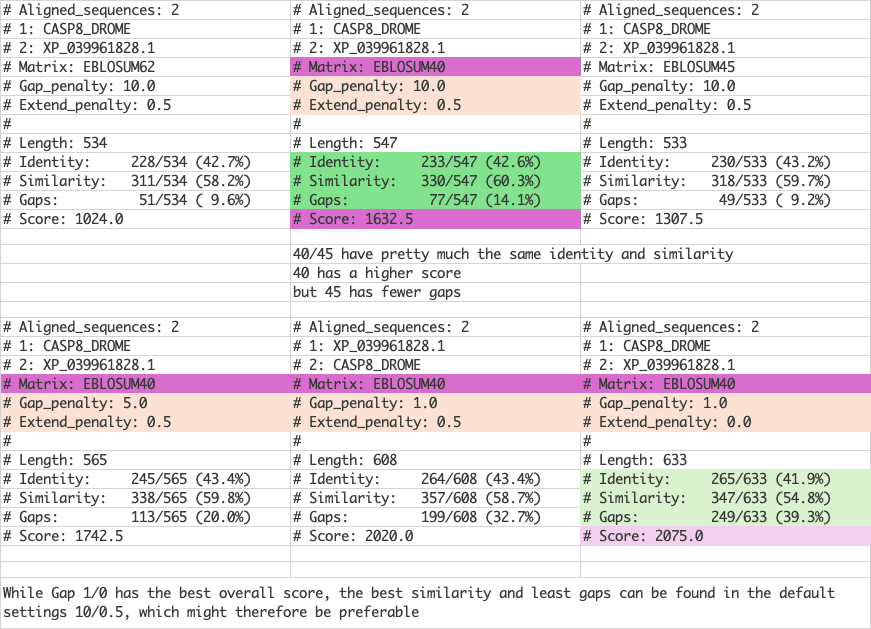

## Exercise 8 - Best Alignment in Python

- Use the sequences B3JI28.fasta and B4DTL8.fasta to calculate pairwise Alignments with the help of the ALIGN submodule of Biopython
- Use the matrices PAM250, BLOSUM45, MDM78, JOHNSON, BENNER6 and GONNET1992
- Calculate local and global Alignments for all six matrices
- What are the differences?
- Which combination produced the best result in your opinion?

In [1]:
# load modules and read in files
from Bio import SeqIO
from Bio import Align
from Bio.Align import substitution_matrices

seq1 = SeqIO.read("B3JI28.fasta", "fasta")
seq2 = SeqIO.read("B4DTL8.fasta", "fasta")

print(seq1,seq2)

ID: tr|B3JI28|B3JI28_9BACT
Name: tr|B3JI28|B3JI28_9BACT
Description: tr|B3JI28|B3JI28_9BACT Uncharacterized protein OS=Phocaeicola coprocola DSM 17136 OX=470145 GN=BACCOP_01540 PE=1 SV=1
Number of features: 0
Seq('MELKTQEVMKKLISKLYTAWLIITVGLFSACTPDSFELEGKDVTVDDLVEGIAF...KIL') ID: tr|B4DTL8|B4DTL8_HUMAN
Name: tr|B4DTL8|B4DTL8_HUMAN
Description: tr|B4DTL8|B4DTL8_HUMAN cDNA FLJ61389, highly similar to Ras GTPase-activating protein 1 OS=Homo sapiens OX=9606 PE=2 SV=1
Number of features: 0
Seq('MNVVNHFRIIAMCGDYYIGGRRFSSLSDLIGYYSHVSCLLKGEKLLYPVAPPEP...DVR')


In [2]:
# loading the substitution matrices
matrices = {}
matrices["pam250"] = substitution_matrices.load("PAM250")
matrices["blosum45"] = substitution_matrices.load("BLOSUM45")
matrices["mdm78"] = substitution_matrices.load("MDM78")
matrices["johnson"] = substitution_matrices.load("JOHNSON")
matrices["benner"] = substitution_matrices.load("BENNER6")
matrices["gonnet"] = substitution_matrices.load("GONNET1992")

In [3]:
# creating a loop over the matrices and modes

ex8_result = {}

for md in ["local","global"]:
    #setting up my dictionary
    ex8_result[md] = {}

    for mtrx_name,mtrx in matrices.items():
        #creating the PairwiseAligner object
        aligner = Align.PairwiseAligner()

        # setting the parameters
        ## substitution matrix
        aligner.substitution_matrix = mtrx

        ## gap penalties
        aligner.open_gap_score = -10
        aligner.extend_gap_score = -0.5

        
        ## mode
        if md == "local":
            aligner.mode = "local"

        #making the alignment
        alignments = aligner.align(seq1.seq, seq2.seq)

        #saving the information
        ex8_result[md][mtrx_name] = {}
        ex8_result[md][mtrx_name]["score"] = alignments.score
        ex8_result[md][mtrx_name]["len"] = len(alignments)
        ex8_result[md][mtrx_name]["algorithm"] = aligner.algorithm
        
        ex8_result[md][mtrx_name]["alignments"] = {}
        for i in range(len(alignments)):
            ex8_result[md][mtrx_name]["alignments"]["alignment"+str(i)] = {}
            ex8_result[md][mtrx_name]["alignments"]["alignment"+str(i)]["counts"] = alignments[i].counts()
            ex8_result[md][mtrx_name]["alignments"]["alignment"+str(i)]["alignment"] = alignments[i]

print(ex8_result)

{'local': {'pam250': {'score': 224.5, 'len': 12672, 'algorithm': 'Gotoh local alignment algorithm', 'alignments': {'alignment0': {'counts': AlignmentCounts(gaps=272, identities=111, mismatches=377), 'alignment': <Alignment object (2 rows x 760 columns) at 0x1046dfe60>}, 'alignment1': {'counts': AlignmentCounts(gaps=272, identities=110, mismatches=378), 'alignment': <Alignment object (2 rows x 760 columns) at 0x10539fdd0>}, 'alignment2': {'counts': AlignmentCounts(gaps=272, identities=111, mismatches=377), 'alignment': <Alignment object (2 rows x 760 columns) at 0x10433b0b0>}, 'alignment3': {'counts': AlignmentCounts(gaps=272, identities=110, mismatches=378), 'alignment': <Alignment object (2 rows x 760 columns) at 0x1042b9eb0>}, 'alignment4': {'counts': AlignmentCounts(gaps=270, identities=110, mismatches=379), 'alignment': <Alignment object (2 rows x 759 columns) at 0x1043511c0>}, 'alignment5': {'counts': AlignmentCounts(gaps=270, identities=109, mismatches=380), 'alignment': <Alignme

In [5]:
#printing the scores
for mode_key in ex8_result:
    for mtx_key, mtx_value in ex8_result[mode_key].items():
        print(f"Matrix {mtx_key} with {ex8_result[mode_key][mtx_key]["algorithm"]}")
        print(f"produces a score of {ex8_result[mode_key][mtx_key]["score"]}")
        print()

Matrix pam250 with Gotoh local alignment algorithm
produces a score of 224.5

Matrix blosum45 with Gotoh local alignment algorithm
produces a score of 217.0

Matrix mdm78 with Gotoh local alignment algorithm
produces a score of 4.7299999999999995

Matrix johnson with Gotoh local alignment algorithm
produces a score of 5.430000000000001

Matrix benner with Gotoh local alignment algorithm
produces a score of 210.80000000000018

Matrix gonnet with Gotoh local alignment algorithm
produces a score of 185.4999999999998

Matrix pam250 with Gotoh global alignment algorithm
produces a score of 164.5

Matrix blosum45 with Gotoh global alignment algorithm
produces a score of 150.0

Matrix mdm78 with Gotoh global alignment algorithm
produces a score of -158.87000000000015

Matrix johnson with Gotoh global alignment algorithm
produces a score of -219.63

Matrix benner with Gotoh global alignment algorithm
produces a score of 160.30000000000027

Matrix gonnet with Gotoh global alignment algorithm
pr

In [6]:
#printing the scores
for mode_key in ex8_result:
    for mtx_key, mtx_value in ex8_result[mode_key].items():
        print(f"Matrix {mtx_key} with {mode_key}: {ex8_result[mode_key][mtx_key]["score"]}")
        print()

Matrix pam250 with local: 224.5

Matrix blosum45 with local: 217.0

Matrix mdm78 with local: 4.7299999999999995

Matrix johnson with local: 5.430000000000001

Matrix benner with local: 210.80000000000018

Matrix gonnet with local: 185.4999999999998

Matrix pam250 with global: 164.5

Matrix blosum45 with global: 150.0

Matrix mdm78 with global: -158.87000000000015

Matrix johnson with global: -219.63

Matrix benner with global: 160.30000000000027

Matrix gonnet with global: 110.99999999999996



> local alignments are always higher than global

In [7]:
#checking the no of alignements, range from 1 to over 12000
for mode_key in ex8_result:
    for mtx_key, mtx_value in ex8_result[mode_key].items():
        print(f"Matrix {mtx_key} with {mode_key}: {ex8_result[mode_key][mtx_key]["len"]}")
        print()

Matrix pam250 with local: 12672

Matrix blosum45 with local: 768

Matrix mdm78 with local: 1

Matrix johnson with local: 1

Matrix benner with local: 12

Matrix gonnet with local: 32

Matrix pam250 with global: 4608

Matrix blosum45 with global: 144

Matrix mdm78 with global: 1

Matrix johnson with global: 1

Matrix benner with global: 12

Matrix gonnet with global: 32



In [8]:
#printing the counts
for mode_key in ex8_result:
    for mtx_key, mtx_value in ex8_result[mode_key].items():
        print(f"Matrix {mtx_key} with {mode_key}: {ex8_result[mode_key][mtx_key]['alignments']['alignment0']["counts"]}")
        print()

Matrix pam250 with local: AlignmentCounts(gaps=272, identities=111, mismatches=377)

Matrix blosum45 with local: AlignmentCounts(gaps=220, identities=123, mismatches=276)

Matrix mdm78 with local: AlignmentCounts(gaps=0, identities=6, mismatches=34)

Matrix johnson with local: AlignmentCounts(gaps=0, identities=8, mismatches=12)

Matrix benner with local: AlignmentCounts(gaps=257, identities=89, mismatches=419)

Matrix gonnet with local: AlignmentCounts(gaps=169, identities=98, mismatches=379)

Matrix pam250 with global: AlignmentCounts(gaps=382, identities=115, mismatches=410)

Matrix blosum45 with global: AlignmentCounts(gaps=386, identities=148, mismatches=375)

Matrix mdm78 with global: AlignmentCounts(gaps=216, identities=40, mismatches=568)

Matrix johnson with global: AlignmentCounts(gaps=216, identities=52, mismatches=556)

Matrix benner with global: AlignmentCounts(gaps=342, identities=109, mismatches=436)

Matrix gonnet with global: AlignmentCounts(gaps=280, identities=96, mi

In [16]:
# calculating % identity
for mode_key in ex8_result:
    print()
    for mtx_key, mtx_value in ex8_result[mode_key].items():
        ident = ex8_result[mode_key][mtx_key]['alignments']['alignment0']["counts"][1]
        length = 0
        for i in range(3):
            length += ex8_result[mode_key][mtx_key]['alignments']['alignment0']["counts"][i]
        print(f"Matrix {mtx_key} with {mode_key}: Identity is {round(100*ident/length,2)}% and score {ex8_result[mode_key][mtx_key]["score"]}")


Matrix pam250 with local: Identity is 14.61% and score 224.5
Matrix blosum45 with local: Identity is 19.87% and score 217.0
Matrix mdm78 with local: Identity is 15.0% and score 4.7299999999999995
Matrix johnson with local: Identity is 40.0% and score 5.430000000000001
Matrix benner with local: Identity is 11.63% and score 210.80000000000018
Matrix gonnet with local: Identity is 15.17% and score 185.4999999999998

Matrix pam250 with global: Identity is 12.68% and score 164.5
Matrix blosum45 with global: Identity is 16.28% and score 150.0
Matrix mdm78 with global: Identity is 4.85% and score -158.87000000000015
Matrix johnson with global: Identity is 6.31% and score -219.63
Matrix benner with global: Identity is 12.29% and score 160.30000000000027
Matrix gonnet with global: Identity is 11.21% and score 110.99999999999996


> based on the identity I'd say Johnson with local isn't too bad, but it has a low score
> based on score I'd go with BENNER, PAM250 or BLOSUM45

## Exercise 9 - TRUDD domains in Python

- You compared four sequences carrying a TRUD Domain during the earlier parts
- Use these sequences to run local and global pairwise Alignments in Python using the ALIGN submodule of biopython to compare the sequence Q96PZ0.fasta to the other three
- Make sure to adjust the matrix to fit your results while starting with BLOSUM62
- Use the method `counts()` of your alignment objects (`alignments[0].counts()`) to see the number of matches, mismatches and gaps for the alignment
- Afterwards restart the Alignment with a different matrix, BLOSUM90 for example
- How do the results differ between the two versions?
- Which sequence is the most similar one to Q96PZ0.fasta?

In [1]:
# load modules and read in files
from Bio import SeqIO
from Bio import Align
from Bio.Align import substitution_matrices

seq1 = SeqIO.read("Q96PZ0.fasta", "fasta")
seqM3 = SeqIO.read("M3Z3I3.fasta", "fasta")
seqA9 = SeqIO.read("A0A9D3NLI7.fasta", "fasta")
seqA5 = SeqIO.read("A0A5N3XQ52.fasta", "fasta")

comparisons = {}
comparisons["M3Z"] = seqM3
comparisons["A0A9"] = seqA9
comparisons["A0A5"] = seqA5


#setting up result dictionary
ex09_results = {}

# preparing for the substitution matrices
matrices = {}

In [2]:
# loading the substitution matrices
matrices["blosum45"] = substitution_matrices.load("BLOSUM45")
matrices["blosum50"] = substitution_matrices.load("BLOSUM50")
matrices["blosum62"] = substitution_matrices.load("BLOSUM62")
matrices["blosum80"] = substitution_matrices.load("BLOSUM80")
matrices["blosum90"] = substitution_matrices.load("BLOSUM90")

In [3]:
# Creating a functions

def exercise9(mtrx):

# setting dictionary
    ex09_results[mtrx] = {}
    for md in ["local","global"]:
        ex09_results[mtrx][md] = {}
        for comp_name, comp_seq in comparisons.items():
                #creating the PairwiseAligner object
            aligner = Align.PairwiseAligner()

        # setting the parameters
        ## substitution matrix
            aligner.substitution_matrix = matrices[mtrx]

        ## gap penalties
            aligner.open_gap_score = -10
            aligner.extend_gap_score = -0.5

        
        ## mode
            if md == "local":
                aligner.mode = "local"

        #making the alignment
            alignments = aligner.align(seq1.seq, comp_seq.seq)
        
        #save the pertinent results
            ex09_results[mtrx][md][comp_name] = {}
            ex09_results[mtrx][md][comp_name]["score"] = alignments.score
            ex09_results[mtrx][md][comp_name]["len"] = len(alignments)
            ex09_results[mtrx][md][comp_name]["algorithm"] = aligner.algorithm
                
            ex09_results[mtrx][md][comp_name]["alignments"] = {}
            for i in range(len(alignments)):
                ex09_results[mtrx][md][comp_name]["alignments"]["alignment"+str(i)] = {}
                ex09_results[mtrx][md][comp_name]["alignments"]["alignment"+str(i)]["counts"] = alignments[i].counts()
                ex09_results[mtrx][md][comp_name]["alignments"]["alignment"+str(i)]["alignment"] = alignments[i]
                ex09_results[mtrx][md][comp_name]["alignments"]["alignment"+str(i)]["length"] = alignments[i].length

exercise9("blosum62")
print(ex09_results)
        

{'blosum62': {'local': {'M3Z': {'score': 2716.0, 'len': 1, 'algorithm': 'Gotoh local alignment algorithm', 'alignments': {'alignment0': {'counts': AlignmentCounts(gaps=0, identities=517, mismatches=12), 'alignment': <Alignment object (2 rows x 529 columns) at 0x1096aade0>, 'length': 529}}}, 'A0A9': {'score': 2403.0, 'len': 1, 'algorithm': 'Gotoh local alignment algorithm', 'alignments': {'alignment0': {'counts': AlignmentCounts(gaps=22, identities=454, mismatches=136), 'alignment': <Alignment object (2 rows x 612 columns) at 0x1096aadb0>, 'length': 612}}}, 'A0A5': {'score': 3151.0, 'len': 10, 'algorithm': 'Gotoh local alignment algorithm', 'alignments': {'alignment0': {'counts': AlignmentCounts(gaps=5, identities=608, mismatches=49), 'alignment': <Alignment object (2 rows x 662 columns) at 0x1096aaff0>, 'length': 662}, 'alignment1': {'counts': AlignmentCounts(gaps=5, identities=608, mismatches=49), 'alignment': <Alignment object (2 rows x 662 columns) at 0x109655be0>, 'length': 662}, '

In [4]:
for mtrx in ex09_results:
    for md in ex09_results[mtrx]:
        for comp in ex09_results[mtrx][md]:
            print(f"{comp} {md} score: {ex09_results[mtrx][md][comp]["score"]}")

M3Z local score: 2716.0
A0A9 local score: 2403.0
A0A5 local score: 3151.0
M3Z global score: 2640.5
A0A9 global score: 2234.5
A0A5 global score: 3115.0


In [5]:
for mtrx in ex09_results:
    for md in ex09_results[mtrx]:
        for comp in ex09_results[mtrx][md]:
            print(f"{comp} {md} possible alignments: {ex09_results[mtrx][md][comp]["len"]}")

M3Z local possible alignments: 1
A0A9 local possible alignments: 1
A0A5 local possible alignments: 10
M3Z global possible alignments: 1
A0A9 global possible alignments: 4
A0A5 global possible alignments: 20


In [6]:
for mtrx in ex09_results:
    for md in ex09_results[mtrx]:
        for comp in ex09_results[mtrx][md]:
            for alignm in ex09_results[mtrx][md][comp]["alignments"]:
                print(f"{comp} {md} {alignm}: length {ex09_results[mtrx][md][comp]["alignments"][alignm]["length"]}, {ex09_results[mtrx][md][comp]["alignments"][alignm]["counts"]}")

M3Z local alignment0: length 529, AlignmentCounts(gaps=0, identities=517, mismatches=12)
A0A9 local alignment0: length 612, AlignmentCounts(gaps=22, identities=454, mismatches=136)
A0A5 local alignment0: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment1: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment2: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment3: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment4: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment5: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment6: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment7: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment8: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 loca

In [7]:
for mtrx in ex09_results:
    for md in ex09_results[mtrx]:
        for comp in ex09_results[mtrx][md]:
            for alignm in ex09_results[mtrx][md][comp]["alignments"]:
                if comp == "M3Z":
                    print(f"{comp} {md} {alignm}: length {ex09_results[mtrx][md][comp]["alignments"][alignm]["length"]}, {ex09_results[mtrx][md][comp]["alignments"][alignm]["counts"]}")

M3Z local alignment0: length 529, AlignmentCounts(gaps=0, identities=517, mismatches=12)
M3Z global alignment0: length 661, AlignmentCounts(gaps=132, identities=517, mismatches=12)


In [8]:
for mtrx in ex09_results:
    for md in ex09_results[mtrx]:
        for comp in ex09_results[mtrx][md]:
            for alignm in ex09_results[mtrx][md][comp]["alignments"]:
                if comp == "A0A5":
                   print(f"{comp} {md} {alignm}: length {ex09_results[mtrx][md][comp]["alignments"][alignm]["length"]}, {ex09_results[mtrx][md][comp]["alignments"][alignm]["counts"]}")

A0A5 local alignment0: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment1: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment2: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment3: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment4: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment5: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment6: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment7: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment8: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 local alignment9: length 662, AlignmentCounts(gaps=5, identities=608, mismatches=49)
A0A5 global alignment0: length 715, AlignmentCounts(gaps=58, identities=608, mismatches=49)
A0A5 glo

In [9]:
for mtrx in ex09_results:
    for md in ex09_results[mtrx]:
        for comp in ex09_results[mtrx][md]:
            for alignm in ex09_results[mtrx][md][comp]["alignments"]:
                if comp == "A0A9":                    
                    print(f"{comp} {md} {alignm}: length {ex09_results[mtrx][md][comp]["alignments"][alignm]["length"]}, {ex09_results[mtrx][md][comp]["alignments"][alignm]["counts"]}")

A0A9 local alignment0: length 612, AlignmentCounts(gaps=22, identities=454, mismatches=136)
A0A9 global alignment0: length 971, AlignmentCounts(gaps=315, identities=467, mismatches=189)
A0A9 global alignment1: length 971, AlignmentCounts(gaps=315, identities=467, mismatches=189)
A0A9 global alignment2: length 971, AlignmentCounts(gaps=315, identities=467, mismatches=189)
A0A9 global alignment3: length 971, AlignmentCounts(gaps=315, identities=467, mismatches=189)


> M3Z and A0A5 have the same number of identities and mismatches for global and local alignment, but global has more gaps
> A0A9 has fewer identities, but also fewer mismatches and gaps than global alignment

In [12]:
ex09_results["blosum62"]["local"]["A0A5"]["alignments"]["alignment0"]["counts"][1]

608

In [20]:
#sice they all have the same count within one analysis I calculate the identity just once
for mtrx in ex09_results:
    for md in ex09_results[mtrx]:
        for comp in ex09_results[mtrx][md]:                   
                    print(f"{mtrx} {comp} {md}: identity {ex09_results[mtrx][md][comp]["alignments"]["alignment0"]["counts"][1]/ex09_results[mtrx][md][comp]["alignments"]["alignment0"]["length"]}")





blosum62 M3Z local: identity 0.9773156899810964
blosum62 A0A9 local: identity 0.7418300653594772
blosum62 A0A5 local: identity 0.918429003021148
blosum62 M3Z global: identity 0.7821482602118003
blosum62 A0A9 global: identity 0.48094747682801237
blosum62 A0A5 global: identity 0.8503496503496504
blosum50 M3Z local: identity 0.9773156899810964
blosum50 A0A9 local: identity 0.6989409984871406
blosum50 A0A5 local: identity 0.918429003021148
blosum50 M3Z global: identity 0.7821482602118003
blosum50 A0A9 global: identity 0.47741273100616016
blosum50 A0A5 global: identity 0.8503496503496504
blosum80 M3Z local: identity 0.9773156899810964
blosum80 A0A9 local: identity 0.7010463378176383
blosum80 A0A5 local: identity 0.918429003021148
blosum80 M3Z global: identity 0.7821482602118003
blosum80 A0A9 global: identity 0.48689516129032256
blosum80 A0A5 global: identity 0.8503496503496504
blosum90 M3Z local: identity 0.9773156899810964
blosum90 A0A9 local: identity 0.7418300653594772
blosum90 A0A5 loca

> I should repeat M3Z with 80 and 90
> I should repeat A0A9 with 80 and 50
> I should repeat A0A5 with 80 and 90

> I repeat everything with 50, 80 and 90

In [14]:
exercise9("blosum50")
exercise9("blosum80")
exercise9("blosum90")

In [15]:
for mtrx in ex09_results:
    for md in ex09_results[mtrx]:
        for comp in ex09_results[mtrx][md]:
            print(f"{mtrx} {comp} {md} score: {ex09_results[mtrx][md][comp]["score"]}")

blosum62 M3Z local score: 2716.0
blosum62 A0A9 local score: 2403.0
blosum62 A0A5 local score: 3151.0
blosum62 M3Z global score: 2640.5
blosum62 A0A9 global score: 2234.5
blosum62 A0A5 global score: 3115.0
blosum50 M3Z local score: 3432.0
blosum50 A0A9 local score: 3077.0
blosum50 A0A5 local score: 3994.0
blosum50 M3Z global score: 3356.5
blosum50 A0A9 global score: 2919.5
blosum50 A0A5 global score: 3958.0
blosum80 M3Z local score: 4430.0
blosum80 A0A9 local score: 3906.0
blosum80 A0A5 local score: 5140.0
blosum80 M3Z global score: 4354.5
blosum80 A0A9 global score: 3750.0
blosum80 A0A5 global score: 5104.0
blosum90 M3Z local score: 3210.0
blosum90 A0A9 local score: 2766.0
blosum90 A0A5 local score: 3708.0
blosum90 M3Z global score: 3134.5
blosum90 A0A9 global score: 2582.0
blosum90 A0A5 global score: 3672.0


In [17]:
for mtrx in ex09_results:
    for md in ex09_results[mtrx]:
        for comp in ex09_results[mtrx][md]:
            if comp == "M3Z":
                print(f"{mtrx} {comp} {md} score: {ex09_results[mtrx][md][comp]["score"]}")

blosum62 M3Z local score: 2716.0
blosum62 M3Z global score: 2640.5
blosum50 M3Z local score: 3432.0
blosum50 M3Z global score: 3356.5
blosum80 M3Z local score: 4430.0
blosum80 M3Z global score: 4354.5
blosum90 M3Z local score: 3210.0
blosum90 M3Z global score: 3134.5


> for M3Z BLOSUM80 is the best matrix and local scores slightly better

In [18]:
for mtrx in ex09_results:
    for md in ex09_results[mtrx]:
        for comp in ex09_results[mtrx][md]:
            if comp == "A0A5":
                print(f"{mtrx} {comp} {md} score: {ex09_results[mtrx][md][comp]["score"]}")

blosum62 A0A5 local score: 3151.0
blosum62 A0A5 global score: 3115.0
blosum50 A0A5 local score: 3994.0
blosum50 A0A5 global score: 3958.0
blosum80 A0A5 local score: 5140.0
blosum80 A0A5 global score: 5104.0
blosum90 A0A5 local score: 3708.0
blosum90 A0A5 global score: 3672.0


> for A0A5 BLOSUM80 is the best matrix and local scores very slightly better

In [19]:
for mtrx in ex09_results:
    for md in ex09_results[mtrx]:
        for comp in ex09_results[mtrx][md]:
            if comp == "A0A9":
                print(f"{mtrx} {comp} {md} score: {ex09_results[mtrx][md][comp]["score"]}")

blosum62 A0A9 local score: 2403.0
blosum62 A0A9 global score: 2234.5
blosum50 A0A9 local score: 3077.0
blosum50 A0A9 global score: 2919.5
blosum80 A0A9 local score: 3906.0
blosum80 A0A9 global score: 3750.0
blosum90 A0A9 local score: 2766.0
blosum90 A0A9 global score: 2582.0


> for A0A9 BLOSUM80 is the best matrix and local scores somewhat better

In [23]:
#sice they all have the same count within one analysis I calculate the identity just once
for mtrx in ex09_results:
    for md in ex09_results[mtrx]:
        for comp in ex09_results[mtrx][md]:  
            if comp == "A0A9":
                    print(f"{mtrx} {comp} {md}: identity {ex09_results[mtrx][md][comp]["alignments"]["alignment0"]["counts"][1]/ex09_results[mtrx][md][comp]["alignments"]["alignment0"]["length"]}")





blosum62 A0A9 local: identity 0.7418300653594772
blosum62 A0A9 global: identity 0.48094747682801237
blosum50 A0A9 local: identity 0.6989409984871406
blosum50 A0A9 global: identity 0.47741273100616016
blosum80 A0A9 local: identity 0.7010463378176383
blosum80 A0A9 global: identity 0.48689516129032256
blosum90 A0A9 local: identity 0.7418300653594772
blosum90 A0A9 global: identity 0.4746450304259635
